In [3]:
pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 4.0 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633980 sha256=3016c7595859c57e166994c018e47e2c256da6d21a0a41070a9fec4cf078453c
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
from surprise import Reader
from surprise import Dataset
from surprise import SVD
from surprise import KNNBasic
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt
from matplotlib import style

In [5]:
reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(0.5, 5.0), skip_lines=1)

In [7]:
ratings = Dataset.load_from_file("/content/ratings_small.csv", reader=reader)

In [8]:
%%capture
UF_results = []

for k in range(10, 101, 10):
    UF = KNNBasic(k=k, sim_options={'user_based': True})
    result = cross_validate(UF, ratings, measures=['RMSE', 'MAE'], cv=5)
    UF_results.append([np.mean(result['test_rmse']), np.mean(result['test_mae'])])
    
IF_results = []

for k in range(10, 101, 10):
    IF = KNNBasic(k=k, sim_options={'user_based': False})
    result = cross_validate(IF, ratings, measures=['RMSE', 'MAE'], cv=5)
    IF_results.append([np.mean(result['test_rmse']), np.mean(result['test_mae'])])

User -based Collaborative Filtering Number of Neighbours data
          RMSE       MAE
10   0.966501  0.739078
20   0.963128  0.738319
30   0.966085  0.741148
40   0.968778  0.744578
50   0.969940  0.746278
60   0.972348  0.748239
70   0.973311  0.749465
80   0.974850  0.750957
90   0.976540  0.753046
100  0.976664  0.752899 

Item -based Collaborative Filtering Number of Neighbours  data
          RMSE       MAE
10   0.974679  0.754652
20   0.948118  0.732397
30   0.938582  0.724241
40   0.934552  0.720975
50   0.932216  0.718861
60   0.931926  0.718367
70   0.931176  0.717839
80   0.931218  0.717408
90   0.931320  0.717720
100  0.931969  0.718254 



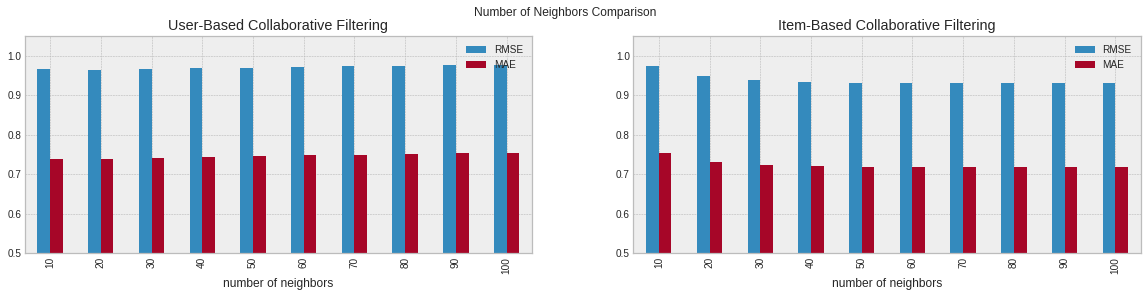

In [17]:
UCF_df = pd.DataFrame(UF_results, columns=['RMSE', 'MAE'], index=['10', '20', '30', '40', '50', '60', '70', '80', '90', '100'])
ICF_df = pd.DataFrame(IF_results, columns=['RMSE', 'MAE'], index=['10', '20', '30', '40', '50', '60', '70', '80', '90', '100'])
plt.style.use('bmh')
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 4))
fig.suptitle('Number of Neighbors Comparison')

print('User -based Collaborative Filtering Number of Neighbours data\n', UCF_df, '\n')
UCF_df.plot.bar(ax=ax1, ylim=(0.5, 1.05));
ax1.set_xlabel('number of neighbors')
ax1.title.set_text('User-Based Collaborative Filtering');



print('Item -based Collaborative Filtering Number of Neighbours  data\n', ICF_df, '\n')
ICF_df.plot.bar(ax=ax2, ylim=(0.5, 1.05));
ax2.set_xlabel('number of neighbors')
ax2.title.set_text('Item-Based Collaborative Filtering');




